# Analysis of the Psychiatric Motor Activity Dataset
## EDA
### Structure of the Data

In [61]:
import pandas as pd
import os
datapath = "../data/raw/psychiatric-motor-activity-dataset/"

# csv files containing the information about the individuals, file by category
humpropfiles = ['adhd-info.csv', 'clinical-info.csv', 'control-info.csv',  'depression-info.csv', 'schizophrenia-info.csv']

# which columns are common to these files?
cols_common = set(list(pd.read_csv(datapath + humpropfiles[0]).columns))
for hpf in humpropfiles:
    print(hpf)
    cols_new = set(list(pd.read_csv(datapath + hpf).columns))
    print(cols_new)
    cols_common = cols_common & cols_new
    print(cols_common)
    print('#########################################')
cols_common = list(cols_common)

# build one common dataframe
df_common = pd.read_csv(datapath + humpropfiles[0]).loc[:,cols_common]
for hpf in humpropfiles[1:]:
    df_common = pd.concat( [df_common, pd.read_csv(datapath + hpf).loc[:,cols_common]] )

df_common.loc[:,'type'] = df_common.loc[:,'number'].str.split('_').str[0]
df_common.loc[:,'type'] = df_common.loc[:,'type'].astype('category')
df_common.loc[:,'agemin'] = df_common.loc[:,'age'].str.split('-').str[0].astype(int)
df_common.loc[:,'agemax'] = df_common.loc[:,'age'].str.split('-').str[1].astype(int)
df_common.loc[:,'agemid'] = (df_common.loc[:,'agemin'] + df_common.loc[:,'agemax']) // 2
df_common.loc[:,'age'] = df_common.loc[:,'age'].astype('category')
df_common.loc[:,'gender'] = df_common.loc[:,'gender'].astype('category')
df_common.loc[:,'acc_time_mins'] = ( 
    pd.to_timedelta(df_common.loc[:,'acc_time'])     # "hh:mm:ss" → Timedelta
      .dt.total_seconds() // 60     # Sekunden → Minuten
      ).astype(int)
df_common.head()

dict_masks = {}
for disi in df_common.loc[:,'type'].unique():
    dict_masks[disi] = df_common.loc[:,'type'] == disi

adhd-info.csv
{'asrs', 'med_antidepr', 'med_moodstab', 'substance', 'med_anxiety_benzo', 'gender', 'age', 'other', 'anxiety', 'acc_time', 'days', 'mdq_pos', 'madrs', 'unipolar', 'add', 'med_stimulants', 'wurs', 'hads_d', 'med_sleep', 'med_antipsych', 'adhd', 'number', 'med', 'bipolar', 'ct', 'hads_a'}
{'asrs', 'med_antidepr', 'med_moodstab', 'substance', 'med_anxiety_benzo', 'gender', 'age', 'other', 'anxiety', 'acc_time', 'days', 'mdq_pos', 'madrs', 'unipolar', 'add', 'med_stimulants', 'wurs', 'med_sleep', 'hads_d', 'med_antipsych', 'adhd', 'number', 'med', 'bipolar', 'ct', 'hads_a'}
#########################################
clinical-info.csv
{'asrs', 'med_antidepr', 'med_moodstab', 'substance', 'med_anxiety_benzo', 'gender', 'age', 'other', 'anxiety', 'acc_time', 'days', 'mdq_pos', 'madrs', 'unipolar', 'add', 'med_stimulants', 'wurs', 'hads_d', 'med_sleep', 'med_antipsych', 'adhd', 'number', 'med', 'bipolar', 'ct', 'hads_a'}
{'asrs', 'med_antidepr', 'med_moodstab', 'substance', 'med_

### Individuals and Measurement Duration

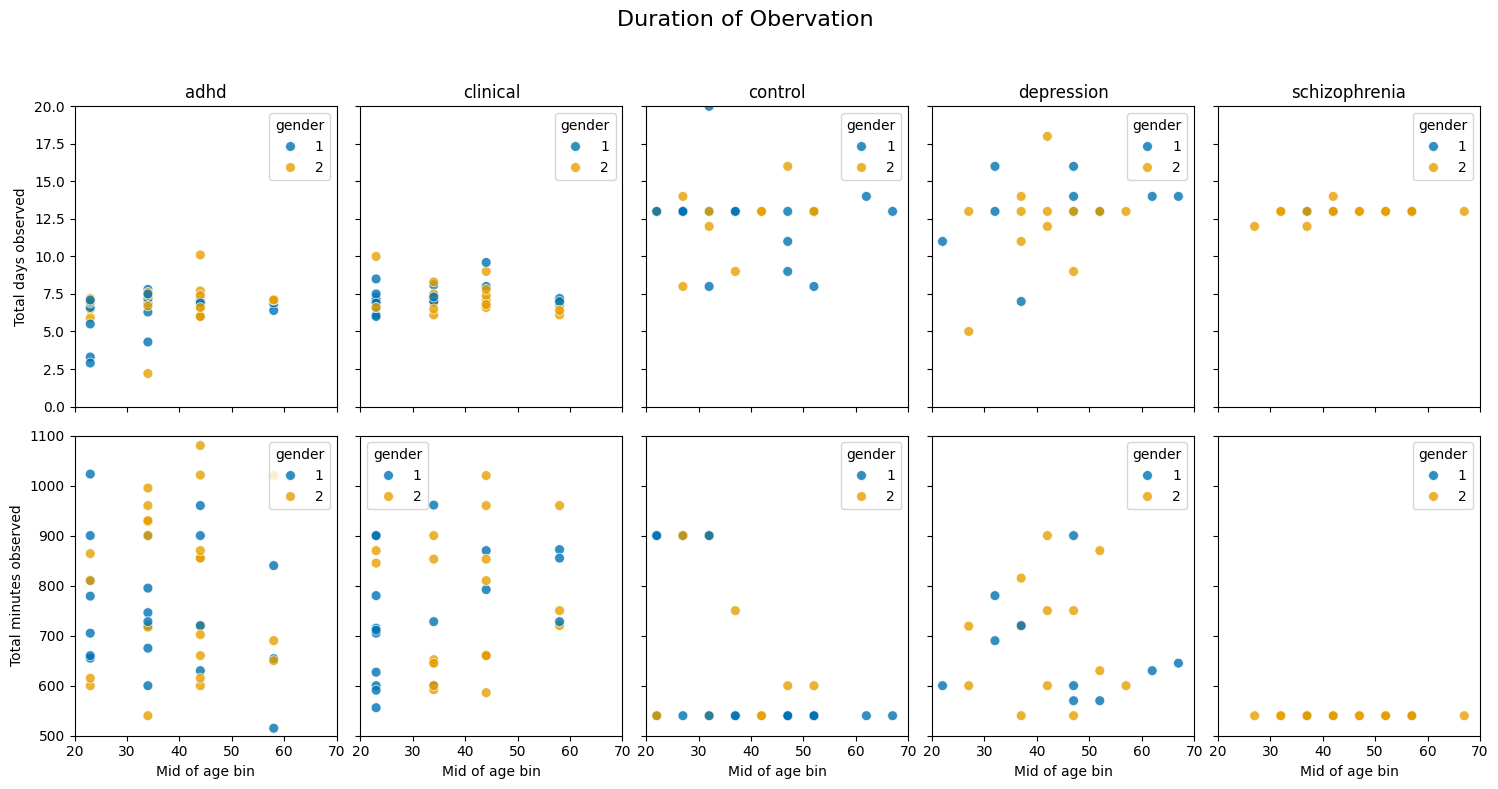

In [86]:
diseases = ['adhd', 'clinical', 'control', 'depression', 'schizophrenia']
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15,8), sharex=True, sharey='row')
for i in range(len(diseases)):
    dis=diseases[i]
    sns.scatterplot(data=df_common.loc[dict_masks[dis],:], x='agemid', y='days', hue='gender', palette = ["#0072B2", "#E69F00"], s=50, alpha=0.8, ax=ax[0,i])
    ax[0,i].set_title(dis)
    ax[0,i].set_xlim(20,70); ax[0,i].set_ylim(0,20)
    ax[0,i].set_xlabel('Mid of age bin')
    ax[0,i].set_ylabel('Total days observed')

    sns.scatterplot(data=df_common.loc[dict_masks[dis],:], x='agemid', y='acc_time_mins', hue='gender', palette = ["#0072B2", "#E69F00"], s=50, alpha=0.8,  ax=ax[1,i])
    #ax[1,i].set_title(dis)
    ax[1,i].set_xlim(20,70); ax[1,i].set_ylim(500,1100)
    ax[1,i].set_xlabel('Mid of age bin')
    ax[1,i].set_ylabel('Total minutes observed')

for a in ax[1, :]:          # untere Reihe
    a.set_xlabel("Mid of age bin")
ax[0,0].set_ylabel("Total days observed")
ax[1,0].set_ylabel("Total minutes observed")

# 🔹 Innere Labels entfernen
for a in ax[:-1, :].flat:
    a.set_xlabel("")

for a in ax[:, 1:].flat:
    a.set_ylabel("")

# 🔹 Gemeinsamer Titel
fig.suptitle("Duration of Obervation", fontsize=16)

# 🔹 Layout sauber ziehen
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
fig.tight_layout()
plt.show()

c:\Users\Trainee\Documents\Hallo_DPP\.venv\Lib\site-packages\pandas\core\indexes\base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


<Axes: xlabel='timestamp'>

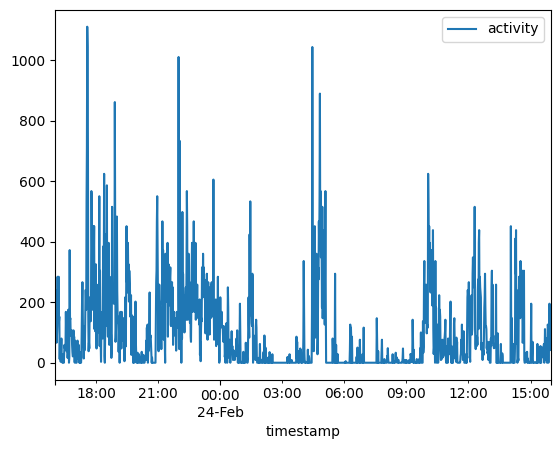

In [123]:
dir_data_raw='../data/raw/psychiatric-motor-activity-dataset/'
dis = 'adhd'
#dis = 'depression'
#dis = 'schizophrenia'
#dis = 'clinic'
#dis = 'control'
pat = '1'
os.listdir(dir_data_raw + dis + '/')
#filename=
df = pd.read_csv(dir_data_raw + dis + '/' + dis + '_' + pat + '.csv')
(df.loc[:,'activity'] >=0).sum()
df.loc[:,'timestamp'] = pd.to_datetime(df.loc[:,'timestamp'])
day = 0
df.iloc[0+day*1440:1440+day*1440,:].plot(kind='line', x='timestamp', y='activity')

C:\Users\Trainee\AppData\Local\Temp\ipykernel_14480\4109390101.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  start_minute = int(df_common.loc[df_common['number']==pat,'acc_time_mins'])
C:\Users\Trainee\AppData\Local\Temp\ipykernel_14480\4109390101.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  start_minute = int(df_common.loc[df_common['number']==pat,'acc_time_mins'])
C:\Users\Trainee\AppData\Local\Temp\ipykernel_14480\4109390101.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  start_minute = int(df_common.loc[df_common['number']==pat,'acc_time_mins'])
C:\Users\Trainee\AppData\Local\Temp\ipykernel_14480\4109390101.py:8: FutureWarning: Calling int on a single element Series is deprecated and w

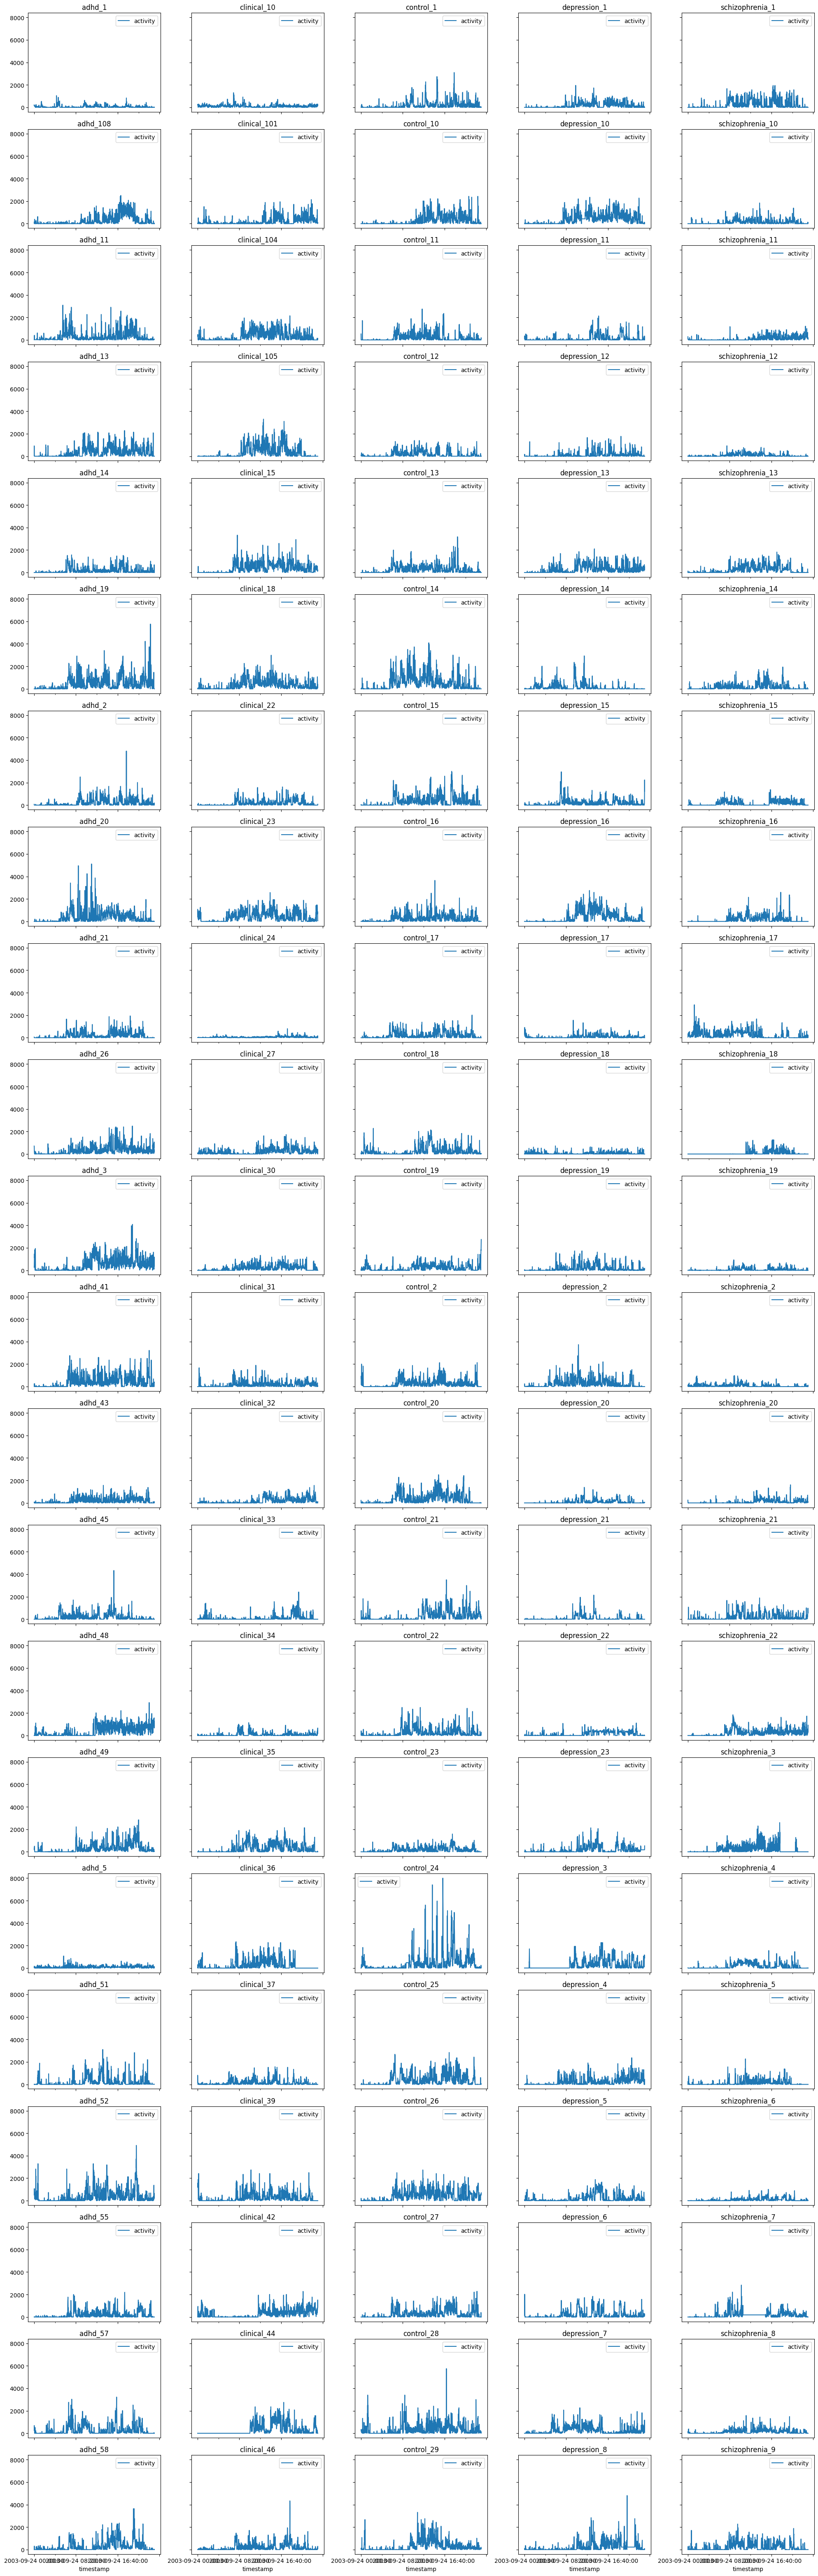

In [154]:
fig2, ax2 = plt.subplots(nrows=22, ncols=5, figsize=(20,66), sharex=True, sharey=True)
for idis in range(len(diseases)):
    dis=diseases[idis]
    mask = df_common.loc[:,'number'].str.contains(dis)
    pats = sorted(df_common.loc[mask,'number'])
    for ipat in range(22): # schizophrenia has lowest number of patients = 22
        pat = pats[ipat]
        start_minute = int(df_common.loc[df_common['number']==pat,'acc_time_mins'])
        df=pd.read_csv(dir_data_raw + dis + '/' + pat + '.csv')
        if df.shape[0] >= 2*1440:
            df.iloc[1440-start_minute : 2*1440-start_minute,:].plot(kind='line', x='timestamp', y='activity', ax=ax2[ipat,idis])
        ax2[ipat,idis].set_title(pat)

fig2.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [149]:
df.iloc[(1440-int(start_minute)):2*1440,:]

C:\Users\Trainee\AppData\Local\Temp\ipykernel_14480\3617362544.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df.iloc[(1440-int(start_minute)):2*1440,:]


,timestamp,date,activity
900,2003-10-01 00:00:00,2003-10-01,0
901,2003-10-01 00:01:00,2003-10-01,0
902,2003-10-01 00:02:00,2003-10-01,0
903,2003-10-01 00:03:00,2003-10-01,0
904,2003-10-01 00:04:00,2003-10-01,0
...,...,...,...
2875,2003-10-02 08:55:00,2003-10-02,372
2876,2003-10-02 08:56:00,2003-10-02,294
2877,2003-10-02 08:57:00,2003-10-02,294
2878,2003-10-02 08:58:00,2003-10-02,284
